# Unit 5 - Financial Planning

In [47]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [48]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [49]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [50]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [51]:
# Fetch current BTC price
btc_price = requests.get(btc_url)

# Fetch current ETH price
eth_price = requests.get(eth_url)

# 
btc_response = btc_price.content
eth_response = eth_price.content

# Convert output to JSON
btc_data = btc_price.json()
eth_data = eth_price.json()

# Select value
btc_value = btc_data['data']['1']['quotes']['USD']['price']
eth_value = eth_data['data']['1027']['quotes']['USD']['price']


# Compute current value of my crypto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73428.00
The current value of your 5.3 ETH is $20463.56


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [52]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [53]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [54]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
spy_agg_df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df
# Preview DataFrame
spy_agg_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-10-01 00:00:00-04:00  114.82  115.06  114.79  115.02  6840179  430.98   

                                                                
                               high     low   close     volume  
time                                                            
2021-10-01 00:00:00-04:00  436.0329  427.24  434.19  110774792

In [55]:
# Pick AGG and SPY close prices
agg_close_price = spy_agg_df["AGG"]["close"].item()
spy_close_price = spy_agg_df["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.02
Current SPY closing price: $434.19


In [56]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21709.50
The current value of your 200 AGG shares is $23004.00


### Savings Health Analysis

In [57]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
cryptos = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

data = {'amount':[cryptos, shares]}
# Create savings DataFrame
df_savings = pd.DataFrame(data, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,93891.565
shares,44713.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

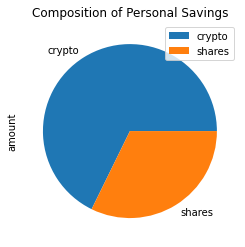

In [58]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [59]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = cryptos + shares

# Validate saving health
if emergency_fund < total_savings:
    print("congratulating the person for having enough money in this fund.")
elif emergency_fund == total_savings:
    print("congratulating the person on reaching this financial goal.")
else:
    print(f'you are ${emergency_fund - total_savings} away from reaching the goal.')

congratulating the person for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [60]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [61]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date, 
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [62]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30y_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [63]:
# Printing the simulation input data
MC_30y_returns.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [64]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30y_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006705,1.005126,0.999691,1.001880,0.996877,1.008845,1.000413,1.007372,0.996342,0.983066,...,0.989031,0.993618,1.004203,0.982911,1.001229,1.004047,0.995244,1.002285,0.989604,1.010519
2,1.009556,0.994696,1.010079,1.005401,0.986534,1.018865,0.996361,0.994814,0.990553,0.985723,...,1.001852,0.993717,1.000811,0.973332,0.995913,1.005130,0.997860,1.022287,0.992271,1.013937
3,1.002345,1.000276,1.030629,0.982196,0.980450,1.022155,0.991265,0.990370,0.995920,0.989485,...,0.993463,0.991125,0.992755,0.965026,0.990993,1.015429,0.997243,1.012768,0.997758,1.023821
4,1.005254,0.999633,1.031953,0.982576,0.980775,1.021691,0.984233,1.000826,1.001557,0.988938,...,1.001122,0.991353,0.988112,0.987222,0.980019,1.015198,1.004217,1.013230,0.988798,1.033249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,35.949753,19.754202,8.140914,21.091486,43.573235,12.229117,8.106276,5.459146,28.258160,8.658757,...,17.228532,4.867042,3.690497,5.749275,3.965230,3.216178,29.431701,12.568392,28.952820,39.503040
7557,35.958441,19.616591,8.093897,21.035998,43.096289,12.296686,8.115854,5.486622,28.173176,8.703186,...,17.077555,4.851478,3.707186,5.736986,3.952529,3.225809,29.552823,12.538381,29.244294,39.842300
7558,36.640480,19.686554,8.088368,21.010256,43.117270,12.202415,8.186454,5.550694,28.039504,8.747413,...,16.937365,4.903684,3.703241,5.806663,3.922375,3.222909,29.747048,12.648303,29.021210,39.905246
7559,36.831033,19.655664,8.183870,21.158377,43.620753,12.276925,8.218817,5.597651,28.072929,8.676991,...,17.056492,4.931148,3.704358,5.827557,3.954875,3.241908,30.076090,12.694433,29.019246,40.031690


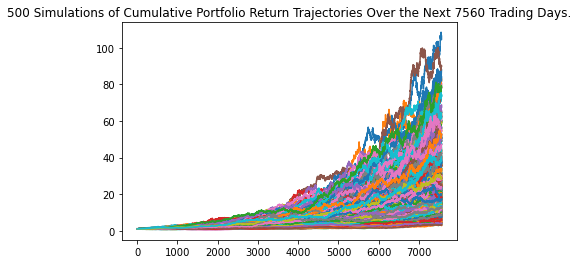

In [65]:
# Plot simulation outcomes
line_plot_30 = MC_30y_returns.plot_simulation()

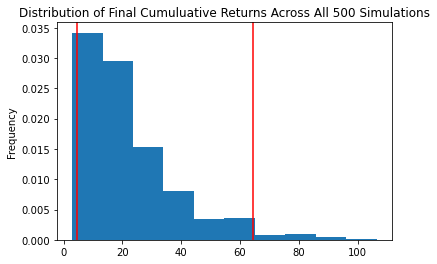

In [66]:
# Plot probability distribution and confidence intervals
dist_plot_30 = MC_30y_returns.plot_distribution()

### Retirement Analysis

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30y_returns.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.116868
std              16.534778
min               2.887220
25%              10.587711
50%              17.548170
75%              27.329251
max             106.463343
95% CI Lower      4.374109
95% CI Upper     64.489345
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [82]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87482.19 and $1289786.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [83]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $131223.28 and $1934680.34


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [70]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5y_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_5y_returns.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [71]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5y_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996869,0.997426,0.994361,1.015716,0.993221,1.004852,1.001788,1.000490,0.989652,0.998213,...,1.007894,1.005078,1.012705,0.987462,1.000587,1.001377,1.003187,0.993412,1.001272,1.009597
2,0.993370,1.004426,1.004049,1.002847,0.993130,1.010832,0.994157,0.988910,1.002293,0.999098,...,1.008276,1.006701,1.028171,0.993658,0.994890,1.003336,1.014541,1.000443,1.003537,1.019021
3,0.999049,1.017135,0.997707,1.006376,0.993840,1.017759,1.003372,0.987057,1.015637,0.988445,...,1.007915,1.013558,1.026947,0.997523,0.998033,0.995689,1.008148,0.990799,0.993274,1.021217
4,0.991703,1.023536,1.002234,1.008362,0.999359,1.023078,1.002646,0.979409,1.032038,0.975420,...,0.990711,1.002303,1.030419,0.990699,0.997649,0.981608,1.002599,1.005272,0.994463,1.027457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.191114,1.282734,1.533121,1.008606,2.405828,1.725879,2.544275,1.551499,1.413508,2.353748,...,2.538319,1.601655,2.134868,1.611000,2.146232,1.319850,1.975993,1.673873,2.343135,2.005772
1257,2.211230,1.304638,1.521463,0.996363,2.383082,1.711174,2.511999,1.548325,1.410709,2.346476,...,2.542380,1.610927,2.121119,1.586313,2.147452,1.329891,1.981674,1.669998,2.338486,2.032230
1258,2.204751,1.293382,1.518255,0.995907,2.372280,1.733496,2.541101,1.543420,1.390304,2.333537,...,2.563146,1.610561,2.143453,1.564565,2.139848,1.340341,1.967016,1.635589,2.341894,2.028379
1259,2.219058,1.279802,1.511730,0.989149,2.407599,1.733601,2.536400,1.539866,1.381610,2.328395,...,2.573676,1.589777,2.130168,1.573492,2.130200,1.333112,1.955202,1.634581,2.331168,2.018625


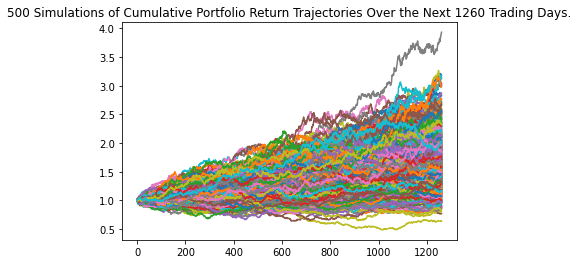

In [72]:
# Plot simulation outcomes
line_plot_5 = MC_5y_returns.plot_simulation()

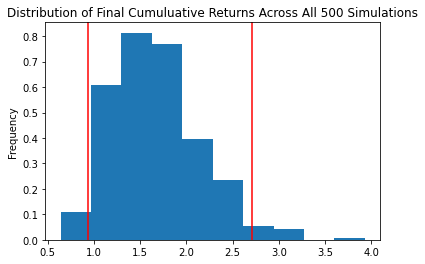

In [73]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_5y_returns.plot_distribution()

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_5y_returns.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.672013
std               0.477479
min               0.637143
25%               1.318436
50%               1.622873
75%               1.946805
max               3.931568
95% CI Lower      0.931201
95% CI Upper      2.709642
Name: 1260, dtype: float64


In [89]:
# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*initial_investment_5,2)
ci_upper_five = round(tbl_5[9]*initial_investment_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55872.07 and $162578.53


### Ten Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10y_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_10y_returns.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [81]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10y_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990947,1.000242,1.000609,0.998138,0.992833,1.005964,0.998287,1.004881,1.012432,0.990591,...,0.993620,1.007014,1.005261,1.003205,0.986479,1.004141,0.988405,0.993396,0.996567,0.991940
2,1.001815,1.007344,0.995568,1.004840,0.991128,1.003118,0.987643,1.000089,1.006501,0.992971,...,0.996247,1.003065,1.006209,1.003226,0.992494,1.006856,0.978461,0.999787,0.985419,0.994625
3,1.002263,1.022439,0.999090,1.023274,0.985253,1.005243,0.992993,1.003570,1.009487,1.005136,...,1.002860,1.005058,1.011047,1.009055,0.999218,1.001604,0.989610,1.010276,0.977822,0.985652
4,0.991600,1.021735,1.004415,1.028129,0.988941,1.005932,0.995101,1.010910,1.009716,1.004157,...,1.003997,1.005395,1.019822,1.005775,1.002561,1.010878,0.991231,1.015775,0.953527,0.975343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.545204,3.426774,3.196646,1.046775,3.081557,2.146308,3.323721,4.681460,1.869095,5.261907,...,3.695981,1.705145,1.875477,1.718987,4.495795,2.366746,3.407141,2.751854,1.444888,5.310501
2517,3.610174,3.451395,3.189834,1.055346,3.080792,2.152896,3.305026,4.707549,1.887257,5.328757,...,3.728349,1.720411,1.898452,1.713235,4.517938,2.358614,3.407331,2.744432,1.448464,5.337994
2518,3.607749,3.434024,3.204104,1.051497,3.046968,2.160586,3.332361,4.704417,1.891169,5.360662,...,3.743307,1.699237,1.907989,1.711116,4.498970,2.341929,3.403967,2.720106,1.448164,5.339772
2519,3.603702,3.432986,3.160633,1.050662,3.029653,2.171282,3.328434,4.697237,1.885123,5.290923,...,3.736206,1.710383,1.899473,1.694804,4.507750,2.330461,3.376716,2.733622,1.435017,5.338977


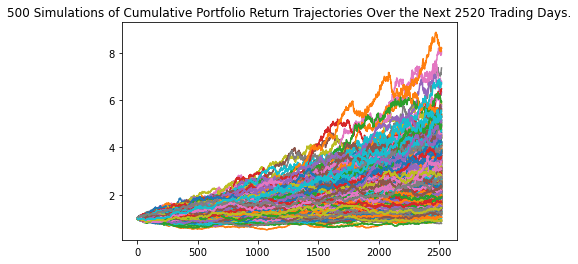

In [84]:
# Plot simulation outcomes
line_plot_10 = MC_10y_returns.plot_simulation()

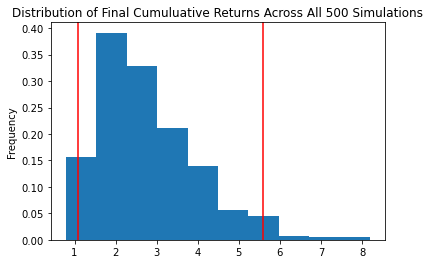

In [85]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10y_returns.plot_distribution()

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_10y_returns.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

count           500.000000
mean              2.759367
std               1.209164
min               0.787080
25%               1.850857
50%               2.530294
75%               3.373747
max               8.196277
95% CI Lower      1.086146
95% CI Upper      5.580937
Name: 2520, dtype: float64


In [88]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8]*initial_investment_10,2)
ci_upper_ten = round(tbl_10[9]*initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $65168.74 and $334856.22
